#ANALYSIS REPORT

Noah Vongratana

11/21/2023

SOURCE: Spotify

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import requests
import base64
import json
import urllib

Setup

In [2]:
CID = pd.read_csv('Spotify_Keys.txt')['Client_ID'].iloc[0]
CS = pd.read_csv('Spotify_Keys.txt')['Client_Secret'].iloc[0]

In [3]:
client_cred = base64.b64encode(str(CID + ":" + CS).encode("ascii"))

In [4]:
headers = {"Authorization": "Basic {}".format(client_cred.decode("ascii"))}

In [5]:
payload = {'grant_type' : 'client_credentials'}
url = 'https://accounts.spotify.com/api/token'

In [6]:
session_key_response = requests.post(url = url, data = payload, headers = headers)

In [7]:
header_key = session_key_response.json()

In [8]:
key = header_key['access_token']

In [9]:
session_headers = {"Authorization": "Bearer {}".format(key)}

In [10]:
id_1 = '5jTDaLFNQovRyjNcWe4cZh'
id_2 = '737av5XsHhJigOC64BV6IY'

Data wrangling begins here:

Album choices:
    
SIX: The only musical I fully appreciate, mostly for its soundtrack
    
Ever After: A more recent discovery that caaught my attention, and has been stuck in my head ever since.

In [11]:
album_1_url = 'https://api.spotify.com/v1/albums/{}/tracks'.format(id_1)
album_2_url = 'https://api.spotify.com/v1/albums/{}/tracks'.format(id_2)

In [12]:
six_results = requests.get(url = album_1_url, headers = session_headers)
marianas_results = requests.get(url = album_2_url, headers = session_headers)

In [13]:
data_six = json.loads(six_results.text)
data_marianas = json.loads(marianas_results.text)

In [14]:
six_df = pd.DataFrame(data_six['items'])
marianas_df = pd.DataFrame(data_marianas['items'])

In [15]:
audio_features_url_1 = 'https://api.spotify.com/v1/audio-features?ids={}'.format(','.join(list(six_df['id'])))
audio_features_url_2 = 'https://api.spotify.com/v1/audio-features?ids={}'.format(','.join(list(marianas_df['id'])))

In [16]:
first_features = requests.get(url = audio_features_url_1, headers = session_headers)
second_features = requests.get(url = audio_features_url_2, headers = session_headers)

In [17]:
features_1 = first_features.json()
features_2 = second_features.json()

In [18]:
six = pd.DataFrame(features_1['audio_features'])
marianas = pd.DataFrame(features_2['audio_features'])

For the histograms below, the following colors represent the album:

SIX = orange, Ever After = blue

Energy and valence (positiveness) were chosen because of the background of the albums selected. Six's music takes heavy inspiration from modern pop aand the tracks in Ever After sound like they fit in at a club.

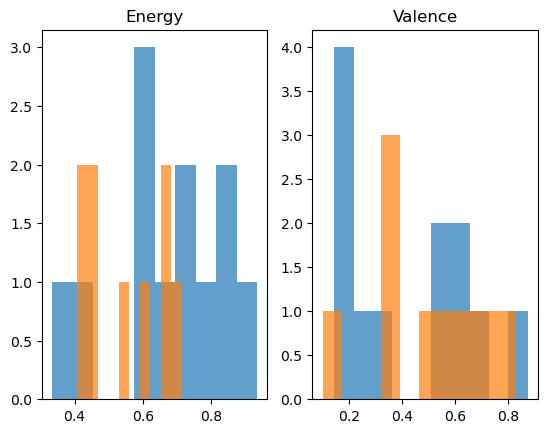

In [19]:
fig1, ax1 = plt.subplots(1, 2)
ax1[0].hist(marianas['energy'], alpha = .7)
ax1[0].hist(six['energy'], alpha = .7)
ax1[0].set_title('Energy')
ax1[1].hist(marianas['valence'], alpha = .7)
ax1[1].hist(six['valence'], alpha = .7)
ax1[1].set_title('Valence')
plt.show()

Conclusions based on the above:

Energy: SIX has notably lower energy than the tracks from Marianas Trench

Valence: The results are mostly even, but Ever After is more positive overall.

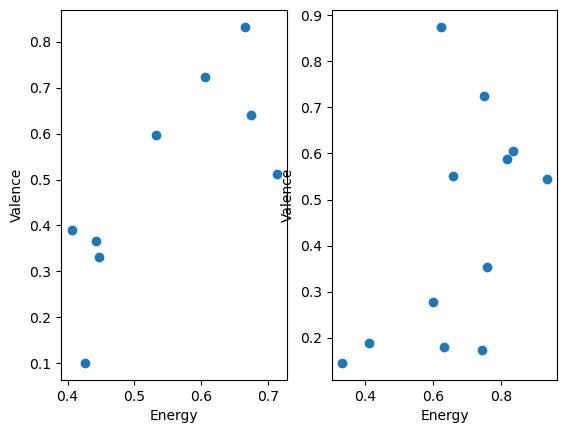

In [20]:
fig2, ax2 = plt.subplots(1, 2)
ax2[0].scatter(x = six['energy'], y = six['valence'], label = 'SIX')
ax2[0].set_xlabel('Energy')
ax2[0].set_ylabel('Valence')
ax2[1].scatter(x = marianas['energy'], y = marianas['valence'], label = 'Ever After')
ax2[1].set_xlabel('Energy')
ax2[1].set_ylabel('Valence')
plt.show()

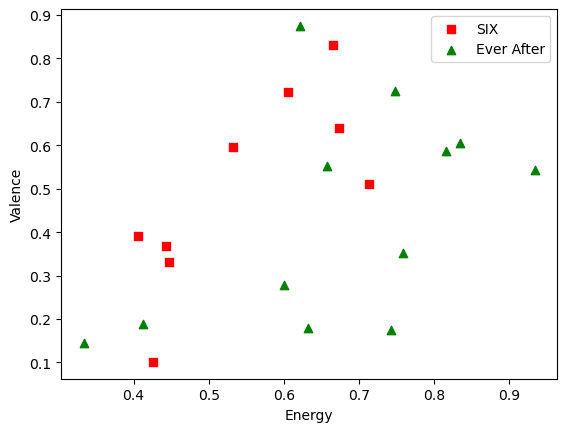

In [21]:
fig3, ax3 = plt.subplots()
ax3.scatter(x = six['energy'], y = six['valence'], label = 'SIX', color = 'red', marker = 's')
ax3.scatter(x = marianas['energy'], y = marianas['valence'], label = 'Ever After', color = 'green', marker = '^')
ax3.set_xlabel('Energy')
ax3.set_ylabel('Valence')
ax3.legend()
plt.show()

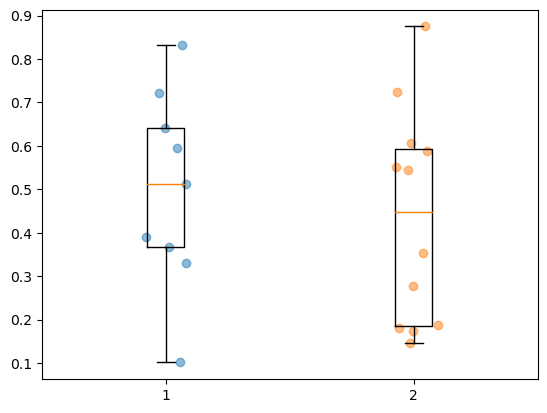

In [23]:
val_1 = six['valence']
val_2 = marianas['valence']
fig4, ax4 = plt.subplots()
six_xs = [1] * len(val_1)
after_xs = [2] * len(val_2)
six_x_jitter = np.random.uniform(-.1, .1, len(six_xs))
after_x_jitter = np.random.uniform(-.1, .1, len(after_xs))
ax4.boxplot(val_1, positions = [1])
ax4.boxplot(val_2, positions = [2])
ax4.scatter(six_xs + six_x_jitter, val_1, alpha = .5)
ax4.scatter(after_xs + after_x_jitter, val_2, alpha = .5)
plt.show()

In [24]:
results = stats.ttest_ind(val_1, val_2)

In [25]:
results

TtestResult(statistic=0.6206177912657246, pvalue=0.5422247734579232, df=19.0)

Based on the Ttest, the two albums are very similar in valence, with the p-value depicting them as practically average compared to each other.

CONCLUSION: The two albums are very similar in their music. The dificulty with the process of wrangling the data is that some audio features did not register for comparisons to be made.